In [1]:
# By Maxim Shen July 1st 2016
#
# This project tries to compare and visualize public donations 
# for Hilary Clinton and Donald Trump

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%%time
path = 'csv/'
dHillary = path + 'Donation-Hilary.csv'
dTrump = path + 'Donation-Trump.csv'
fields = ['contb_receipt_dt','contbr_nm','contb_receipt_amt','contbr_city','contbr_st','contbr_occupation']
df_Hillary = pd.read_csv(dHillary, usecols=fields, low_memory=False, index_col = False)
df_Trump = pd.read_csv(dTrump, usecols=fields, low_memory=False, index_col = False)

CPU times: user 1.75 s, sys: 139 ms, total: 1.89 s
Wall time: 1.92 s


In [3]:
%%time
df_Hillary['contb_receipt_dt'] = pd.to_datetime(df_Hillary.contb_receipt_dt)
df_Trump['contb_receipt_dt'] = pd.to_datetime(df_Trump.contb_receipt_dt)

CPU times: user 2min 4s, sys: 62.1 ms, total: 2min 5s
Wall time: 2min 5s


In [4]:
df_Hillary = df_Hillary.sort_values(by='contb_receipt_dt', ascending=True)
df_Hillary.index = range(0, len(df_Hillary))
weekly_grouped_df_Hillary = df_Hillary.groupby('contb_receipt_dt')['contb_receipt_amt'].sum().resample('W').sum()
weekly_grouped_df_Hillary.head()

contb_receipt_dt
2015-04-12    1437355.21
2015-04-19    4080285.56
2015-04-26    3873739.56
2015-05-03    4677647.26
2015-05-10    3311326.18
Freq: W-SUN, Name: contb_receipt_amt, dtype: float64

In [5]:
df_Trump = df_Trump.sort_values(by='contb_receipt_dt', ascending=True)
df_Trump.index = range(0, len(df_Trump))
weekly_grouped_df_Trump = df_Trump.groupby('contb_receipt_dt')['contb_receipt_amt'].sum().resample('W').sum()
weekly_grouped_df_Trump.head()

contb_receipt_dt
2015-06-07     2700.0
2015-06-14        NaN
2015-06-21    24750.0
2015-06-28    16375.0
2015-07-05    28800.0
Freq: W-SUN, Name: contb_receipt_amt, dtype: float64

In [6]:
combined_weekly = pd.concat([weekly_grouped_df_Hillary, weekly_grouped_df_Trump], axis=1)
combined_weekly.columns = ['weekly_donations_Hillary', 'weekly_donations_Trump']
combined_weekly.tail()

,weekly_donations_Hillary,weekly_donations_Trump
contb_receipt_dt,,
2016-05-08,4018367.64,334835.69
2016-05-15,4117368.52,213023.60
2016-05-22,4936457.27,210257.59
2016-05-29,3673856.42,192234.21
2016-06-05,6066187.57,47558.39


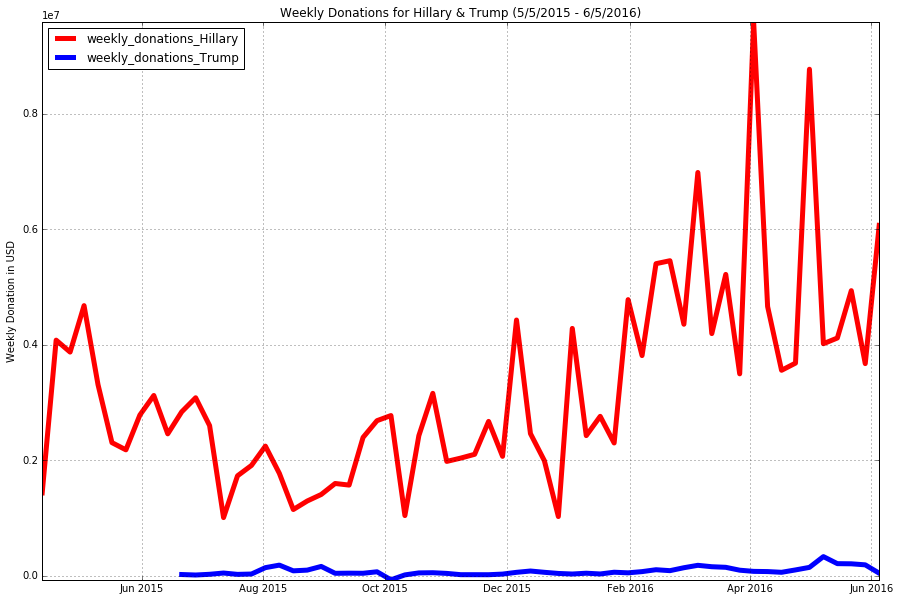

In [7]:
# Chart below plots the weekly accumulated donation for each candidate. It tells us :
# 1) How aggressive Hillary was, when it approached Apr 2016
# 2) How rich Trump is

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(combined_weekly['weekly_donations_Hillary'], 'r', lw=5)
plt.plot(combined_weekly['weekly_donations_Trump'], 'b', lw=5)
plt.grid(True)
plt.ylabel('Weekly Donation in USD')
plt.title('Weekly Donations for Hillary & Trump (5/5/2015 - 6/5/2016)')
plt.legend(loc=0)
plt.axis('tight')
plt.show()

In [8]:
# From the chart above, it tells that Trump barely received/accepted donations, compared with Hillary 
# Therefore, we can't tell each state's preference between these two candidates from donations wise.

# Next step, 
# we would like to compare which top states are financially supporting each candidate
# Surprisingly, we find that NY leads the donations for Hilary, while NY only ranks at 4th for Trump

# Hilary Top 10 donation states in 100%  
df_Hillary_groupby_state= df_Hillary.groupby(['contbr_st']).agg({'contb_receipt_amt': 'sum'})
total = df_Hillary_groupby_state['contb_receipt_amt'].sum()
hillary_state_pcts = 100 * df_Hillary_groupby_state / total
hillary_state_pcts.sort_values(by='contb_receipt_amt', ascending=0).head(10)

,contb_receipt_amt
contbr_st,
NY,25.207752
CA,19.852557
FL,5.342353
TX,5.114218
MA,3.689046
IL,3.587083
DC,3.540879
MD,3.072800
VA,2.878097


In [9]:
# Trump Top 10 donation states in 100%  

df_Trump_groupby_state= df_Trump.groupby(['contbr_st']).agg({'contb_receipt_amt': 'sum'})
total = df_Trump_groupby_state['contb_receipt_amt'].sum()
trump_state_pcts = 100 * df_Trump_groupby_state / total
trump_state_pcts.sort_values(by='contb_receipt_amt', ascending=0).head(10)

,contb_receipt_amt
contbr_st,
CA,11.787344
TX,11.363898
FL,10.624257
NY,6.996144
PA,3.279450
GA,3.247041
VA,2.770743
IL,2.714476
TN,2.572035


In [10]:
result = hillary_state_pcts.join(trump_state_pcts,  how='left', lsuffix='_x')
result.columns = ['state_%_Hillary', 'state_%_Trump']
result = result.fillna(0)
result.head()

,state_%_Hillary,state_%_Trump
contbr_st,,
AA,0.003939,0.010550
AE,0.016407,0.034321
AK,0.068904,0.459643
AL,0.332128,1.181650
AP,0.007667,0.015633


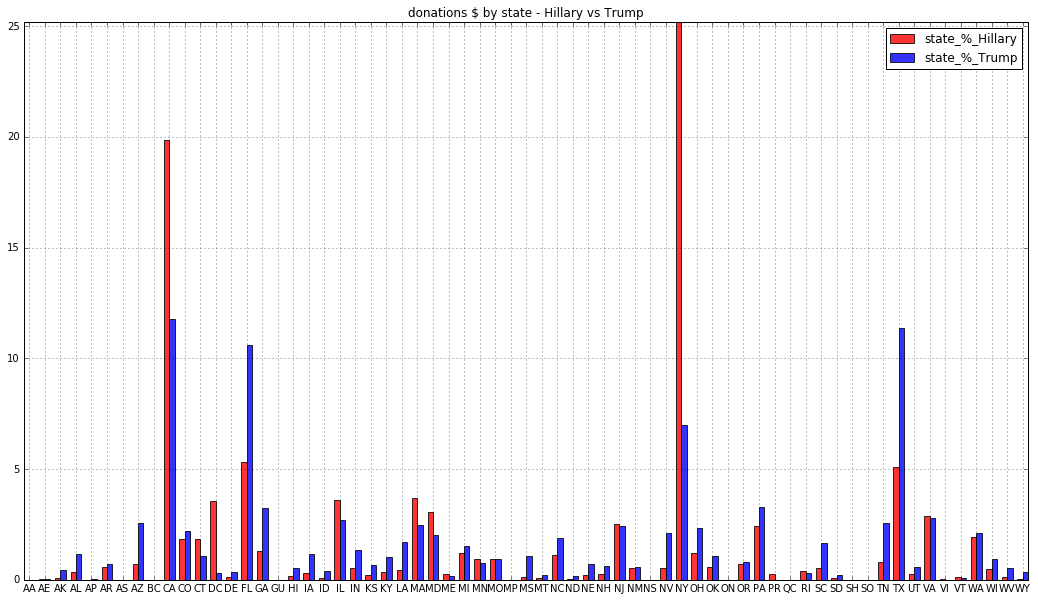

In [11]:
%matplotlib inline
c = np.random.randint(0, 10, len(result))

plt.figure(figsize=(18, 10))
n_groups = len(result)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, result['state_%_Hillary'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='state_%_Hillary')
 
rects2 = plt.bar(index + bar_width, result['state_%_Trump'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='state_%_Trump')
plt.grid(True)
plt.title('donations $ by state - Hillary vs Trump')
plt.legend(loc=0)
plt.axis('tight')
plt.xticks(index + bar_width, result.index)
plt.show()